In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model = IsolationForest(contamination=0.05, random_state=42)
preds = model.fit_predict(X_scaled)

X['anomaly'] = preds

anomaly
 1    540
-1     29
Name: count, dtype: int64


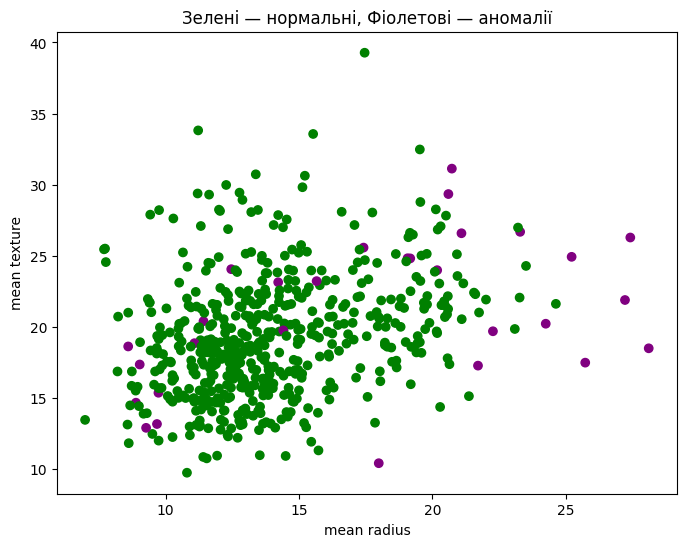

In [14]:
print(X['anomaly'].value_counts())

plt.figure(figsize=(8, 6))
colors = X['anomaly'].map({1: 'green', -1: 'purple'})
plt.scatter(X['mean radius'], X['mean texture'], c=colors)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('Зелені — нормальні, Фіолетові — аномалії')
plt.show()